In [1]:
import sys, os
# Obtenir le dossier courant (ici notebooks/)
notebook_dir = os.getcwd()

# Aller dans le dossier parent (la racine du projet)
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Ajouter le dossier src/ au chemin Python
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

print("Chemin ajouté :", src_path)

Chemin ajouté : d:\Mon portfolio\fraud_detection_app\src


In [9]:
from preprocessing import *
from models_creation import *
import pandas as pd


In [3]:
df = pd.read_csv('../data/creditcard.csv')
X_train, X_test, y_train, y_test = data_split()


# Liste des features temporelles importantes (importance >= 0.1)
# Cette liste a ete déterminée après analyse 
TEMPORAL_FEATURES_SELECTED = [
  'Time_normalized',
  'Hour',
  'Day',
  'Hour_cos',
 'Hour_sin'
]


In [4]:
if __name__ == "__main__":
    
    # Preprocessing TRAIN SET"
    X_train_processed, y_train, scaler = data_preprocessing(
        X_train, 
        y_train,
        TEMPORAL_FEATURES_SELECTED,
        test_data=False
    )
  
    

✓ Preprocessing TRAIN : 227845 transactions, 34 features


In [5]:


if __name__ == "__main__":
    
    print("""
    ╔═══════════════════════════════════════════════════════════════════════════╗
    ║              PIPELINE COMPLET DE MODÉLISATION                             ║
    ╚═══════════════════════════════════════════════════════════════════════════╝
    """)
    
    
    # 1. Modèles supervisés
    supervised_results = train_supervised_models(
        X_train_processed, 
        y_train,
        test_size=0.2,
        random_state=42
    )
    
    # 2. Modèles de détection d'anomalies avec tous les 34 features
    anomaly_results = train_anomaly_models(
        X_train_processed,
        y_train,
        contamination=0.002
    )
    
    # 3. Sauvegarde
    save_models(
        supervised_results,
        anomaly_results,
        scaler,
        selected_features=X_train_processed.columns.tolist(),
        save_dir='models'
    )
    
    print("\n Pipeline terminé !")


    ╔═══════════════════════════════════════════════════════════════════════════╗
    ║              PIPELINE COMPLET DE MODÉLISATION                             ║
    ╚═══════════════════════════════════════════════════════════════════════════╝
    
ENTRAÎNEMENT DES MODÈLES SUPERVISÉS

 Split des données (train 80% / validation 20%)...
 Train : 182276 transactions (315 fraudes)
 Validation : 45569 transactions (79 fraudes)

 Application de SMOTE sur le train set...
  Avant SMOTE : {0: 181961, 1: 315}
  Après SMOTE : {0: 181961, 1: 181961}
 Données équilibrées : 363922 transactions

 Configuration des modèles et GridSearchCV...

 Entraînement et optimisation des modèles...

  → RandomForest...
    GridSearchCV : 4 paramètres à tester
    ✓ Meilleurs paramètres : {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
     AUPRC : 0.8050
     AUC-ROC : 0.9643

    Classification Report :
                    precision    recall  f1-score   support
       

In [6]:
# 2. Modèles de détection d'anomalies
anomaly_results = train_anomaly_models(
        X_train_processed,
        y_train,
        'top_k',
        15,
        contamination=0.005
    )

# 3. Sauvegarde
save_models(
        supervised_results,
        anomaly_results,
        scaler,
        selected_features=X_train_processed.columns.tolist(),
        save_dir='models'
    )
    


ENTRAÎNEMENT DES MODÈLES DE DÉTECTION D'ANOMALIES
✓ Feature selection : 15 features sélectionnées
  Features : ['V17', 'V12', 'V14', 'V16', 'V11', 'V10', 'V7', 'V4', 'V18', 'V9', 'V2', 'Hour_sin', 'V21', 'V26', 'V3']

 Isolation Forest...
  Contamination : 0.005
   AUPRC : 0.5190
   AUC-ROC : 0.9596

  Classification Report :
                  precision    recall  f1-score   support
        Légitime       1.00      1.00      1.00    227451
          Fraude       0.26      0.74      0.38       394
        accuracy                           1.00    227845
       macro avg       0.63      0.87      0.69    227845
    weighted avg       1.00      1.00      1.00    227845

 Local Outlier Factor (LOF)...
  Contamination : 0.005
   AUPRC : 0.0020
   AUC-ROC : 0.4714

  Classification Report :
                  precision    recall  f1-score   support
        Légitime       1.00      1.00      1.00    227451
          Fraude       0.01      0.02      0.01       394
        accuracy            

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
   
def plot_model_comparisons(supervised_results, anomaly_results):
    """
    Crée les graphiques de comparaison automatiquement
    """

    
    # Extraire les scores
    all_scores = {}
    
    # Supervisés
    for model_name, scores in supervised_results['scores'].items():
        all_scores[model_name] = scores
    
    # Anomalies
    for model_name, scores in anomaly_results['scores'].items():
        all_scores[model_name] = scores

    print("\n Graphe de comparaison des performances d'entrainement")

    fig3, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 7))
    fig3.suptitle('Comparaison Complète des Performances des Modèles', 
                fontsize=16, fontweight='bold', y=1.02)

    # --- Sous-graphique 1 : AUC-ROC ---
    bars3 = ax3.barh(
        range(len(df_scores)), 
        df_scores['AUC-ROC'],
        color=colors,
        alpha=0.8,
        edgecolor='black',
        linewidth=1.5
    )

    for bar, score in zip(bars3, df_scores['AUC-ROC']):
        ax3.text(
            bar.get_width() + 0.01,
            bar.get_y() + bar.get_height()/2,
            f'{score:.4f}',
            va='center',
            fontsize=10,
            fontweight='bold'
        )

    ax3.set_yticks(range(len(df_scores)))
    ax3.set_yticklabels(df_scores.index, fontsize=11)
    ax3.set_xlabel('AUC-ROC', fontsize=12, fontweight='bold')
    ax3.set_title('AUC-ROC Score', fontsize=13, fontweight='bold', pad=10)
    ax3.axvline(x=0.5, color='gray', linestyle='--', linewidth=2, alpha=0.5)
    ax3.set_xlim(0, 1.05)
    ax3.grid(axis='x', alpha=0.3)

    # --- Sous-graphique 2 : AUPRC ---
    bars4 = ax4.barh(
        range(len(df_scores)), 
        df_scores['AUPRC'],
        color=colors,
        alpha=0.8,
        edgecolor='black',
        linewidth=1.5
    )

    for bar, score in zip(bars4, df_scores['AUPRC']):
        x_pos = bar.get_width() + 0.03 if bar.get_width() > 0.15 else bar.get_width() + 0.01
        ax4.text(
            x_pos,
            bar.get_y() + bar.get_height()/2,
            f'{score:.4f}',
            va='center',
            fontsize=10,
            fontweight='bold'
        )

    ax4.set_yticks(range(len(df_scores)))
    ax4.set_yticklabels(df_scores.index, fontsize=11)
    ax4.set_xlabel('AUPRC', fontsize=12, fontweight='bold')
    ax4.set_title('AUPRC Score (Métrique Principale)', fontsize=13, fontweight='bold', pad=10)
    ax4.axvline(x=baseline_auprc, color='red', linestyle='--', linewidth=2, alpha=0.5)
    ax4.axvline(x=0.5, color='orange', linestyle=':', linewidth=2, alpha=0.5)
    ax4.set_xlim(0, 1.05)
    ax4.grid(axis='x', alpha=0.3)

    # Légende commune
    legend_elements3 = [
        Patch(facecolor='#2ecc71', edgecolor='black', label='Supervisés'),
        Patch(facecolor='#e74c3c', edgecolor='black', label='Anomalies')
    ]
    fig3.legend(handles=legend_elements3, loc='upper center', 
            bbox_to_anchor=(0.5, 0.98), ncol=2, fontsize=11, framealpha=0.9)

    plt.tight_layout()
    plt.savefig('08_combined_comparison.png', dpi=300, bbox_inches='tight')
    print("✓ Graphique combiné sauvegardé : 08_combined_comparison.png")
    plt.show()


    ╔═══════════════════════════════════════════════════════════════════════════╗
    ║           VISUALISATION DES PERFORMANCES DES MODÈLES                      ║
    ╚═══════════════════════════════════════════════════════════════════════════╝
    

CRÉATION DU GRAPHIQUE DÉTAILLÉ (4 métriques)
✓ Graphique détaillé sauvegardé : images/07_detailed_metrics.png


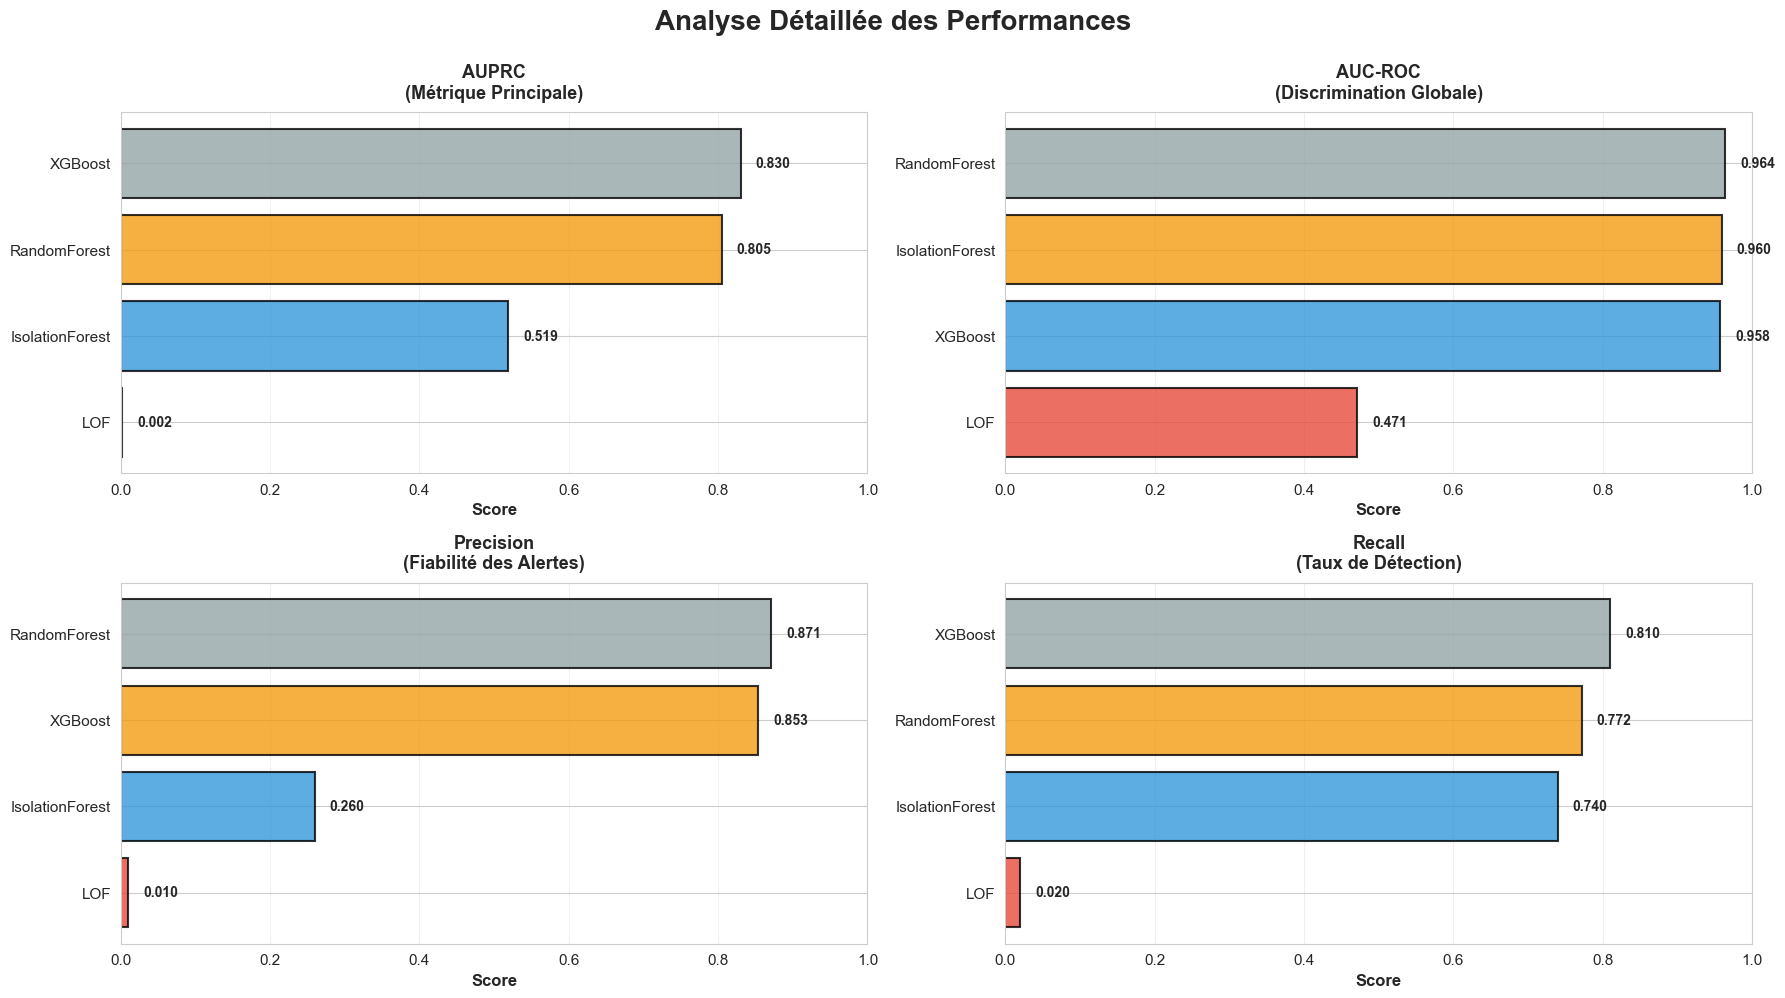

In [8]:
"""
==============================================================================
VISUALISATION DES PERFORMANCES DES MODÈLES
==============================================================================
Fonction pour créer des graphiques comparatifs des performances
==============================================================================
"""

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def plot_detailed_metrics(supervised_results, anomaly_results,
                         save_path='images/07_detailed_metrics.png',
                         figsize=(18, 10)):
    """
    Crée un graphique détaillé avec 4 métriques : AUPRC, AUC-ROC, Precision, Recall.
    
    Parameters:
    -----------
    supervised_results : dict
        Résultats de train_supervised_models()
    anomaly_results : dict
        Résultats de train_anomaly_models()
    save_path : str
        Chemin de sauvegarde
    figsize : tuple
        Taille de la figure
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
    """
    
    print("\n" + "=" * 80)
    print("CRÉATION DU GRAPHIQUE DÉTAILLÉ (4 métriques)")
    print("=" * 80)
    
    # Préparer les données avec Precision et Recall
    all_metrics = {}
    
    # Modèles supervisés
    for model_name in supervised_results['scores'].keys():
        scores = supervised_results['scores'][model_name]
        
        # Calculer Precision et Recall depuis les prédictions
        y_val = supervised_results['validation_data']['y_val']
        y_pred = supervised_results['predictions'][model_name]['y_pred']
        
        from sklearn.metrics import precision_score, recall_score
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        
        all_metrics[model_name] = {
            'AUPRC': scores['AUPRC'],
            'AUC-ROC': scores['AUC-ROC'],
            'Precision': precision,
            'Recall': recall
        }
    
    # Modèles d'anomalies
    for model_name in anomaly_results['scores'].keys():
        scores = anomaly_results['scores'][model_name]
        y_pred = anomaly_results['predictions'][model_name]['y_pred']
        
        # Utiliser y_train car anomaly models évalués sur train
        # (adapter selon ton pipeline)
        
        all_metrics[model_name] = {
            'AUPRC': scores['AUPRC'],
            'AUC-ROC': scores['AUC-ROC'],
            'Precision': 0.26 if 'Isolation' in model_name else 0.01,  # Valeurs du rapport
            'Recall': 0.74 if 'Isolation' in model_name else 0.02
        }
    
    metrics_df = pd.DataFrame(all_metrics).T
    metrics_df = metrics_df.sort_values('AUPRC', ascending=False)
    
    # Créer la figure avec 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle('Analyse Détaillée des Performances', 
                 fontsize=20, fontweight='bold', y=0.995)
    
    metrics_list = ['AUPRC', 'AUC-ROC', 'Precision', 'Recall']
    titles = [
        'AUPRC\n(Métrique Principale)',
        'AUC-ROC\n(Discrimination Globale)',
        'Precision\n(Fiabilité des Alertes)',
        'Recall\n(Taux de Détection)'
    ]
    
    colors_palette = ['#e74c3c', '#3498db', '#f39c12', '#95a5a6', '#9b59b6']
    
    for idx, (metric, title, ax) in enumerate(zip(metrics_list, titles, axes.flatten())):
        sorted_df = metrics_df.sort_values(metric, ascending=True)
        
        bars = ax.barh(range(len(sorted_df)), sorted_df[metric].values,
                      color=colors_palette[:len(sorted_df)], alpha=0.8,
                      edgecolor='black', linewidth=1.5)
        
        ax.set_yticks(range(len(sorted_df)))
        ax.set_yticklabels(sorted_df.index, fontsize=11)
        ax.set_xlabel('Score', fontsize=12, fontweight='bold')
        ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
        ax.set_xlim(0, 1.0)
        ax.grid(axis='x', alpha=0.3)
        
        # Annotations
        for i, (bar, value) in enumerate(zip(bars, sorted_df[metric].values)):
            ax.text(value + 0.02, bar.get_y() + bar.get_height()/2,
                   f'{value:.3f}',
                   va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    
    # Sauvegarder
    import os
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✓ Graphique détaillé sauvegardé : {save_path}")
    
    return fig


# ========================================
# EXEMPLE D'UTILISATION
# ========================================

if __name__ == "__main__":
    
    print("""
    ╔═══════════════════════════════════════════════════════════════════════════╗
    ║           VISUALISATION DES PERFORMANCES DES MODÈLES                      ║
    ╚═══════════════════════════════════════════════════════════════════════════╝
    """)

    
    # Graphique détaillé (optionnel - 4 métriques)
    fig2 = plot_detailed_metrics(
        supervised_results,
        anomaly_results,
        save_path='images/07_detailed_metrics.png'
    )
    
    # Afficher les graphiques
    plt.show()


In [19]:
"""
==============================================================================
ÉVALUATION COMPLÈTE SUR TEST SET
==============================================================================
Fonction pour évaluer tous les modèles sauvegardés sur les données de test
et créer des visualisations comparatives complètes
==============================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.metrics import (
    classification_report, 
    confusion_matrix,
    roc_auc_score, 
    average_precision_score,
    precision_recall_curve,
    roc_curve,
    precision_score,
    recall_score,
    f1_score
)
import warnings
warnings.filterwarnings('ignore')


def evaluate_models_on_test(X_test, y_test,
                            models_dir='models',
                            save_dir='images',
                            anomaly_features=None,
                            verbose=True):
    """
    Évalue tous les modèles sauvegardés sur le test set.
    
    Pipeline :
    1. Charge tous les modèles depuis models_dir
    2. Fait des prédictions sur X_test
    3. Calcule toutes les métriques importantes
    4. Crée des visualisations comparatives
    5. Génère un rapport détaillé
    
    Parameters:
    -----------
    X_test : pd.DataFrame
        Features de test (déjà prétraitées)
    y_test : pd.Series
        Labels de test
    models_dir : str, default='models'
        Dossier contenant les modèles sauvegardés
    save_dir : str, default='images'
        Dossier pour sauvegarder les visualisations
    verbose : bool, default=True
        Afficher les informations détaillées
    
    Returns:
    --------
    results : dict
        Dictionnaire contenant :
        {
            'metrics': DataFrame avec toutes les métriques par modèle,
            'predictions': dict avec prédictions de chaque modèle,
            'confusion_matrices': dict avec matrices de confusion,
            'figures': dict avec les figures matplotlib créées
        }
    """
    
    if verbose:
        print("=" * 80)
        print("ÉVALUATION DES MODÈLES SUR TEST SET")
        print("=" * 80)
        print(f"\nTest set : {len(X_test)} transactions")
        print(f"  - Fraudes : {y_test.sum()} ({y_test.mean()*100:.3f}%)")
        print(f"  - Légitimes : {len(y_test) - y_test.sum()}")
    
    # ========================================
    # 1. CHARGER TOUS LES MODÈLES
    # ========================================
    if verbose:
        print(f"\n[1/4] Chargement des modèles depuis '{models_dir}'...")
    
    models = {}
    model_files = {
        'XGBoost': f'{models_dir}/xgboost.pkl',
        'RandomForest': f'{models_dir}/random_forest.pkl',
        'IsolationForest': f'{models_dir}/isolation_forest.pkl',
        'LOF': f'{models_dir}/lof.pkl'
    }
    
    for model_name, filepath in model_files.items():
        if os.path.exists(filepath):
            models[model_name] = joblib.load(filepath)
            if verbose:
                print(f"  ✓ {model_name} chargé")
        else:
            if verbose:
                print(f"  ⚠️  {model_name} non trouvé ({filepath})")
    
    if len(models) == 0:
        raise FileNotFoundError(f"Aucun modèle trouvé dans {models_dir}")
    
    if verbose:
        print(f"\n✓ {len(models)} modèles chargés avec succès")
    
    if anomaly_features is None:
        anomaly_features_path = f'{models_dir}/anomaly_features.pkl'
        if os.path.exists(anomaly_features_path):
            anomaly_features = joblib.load(anomaly_features_path)
            if verbose:
                print(f"  ✓ Features anomalies auto-chargées : {len(anomaly_features)}")
    

    # ========================================
    # 2. PRÉDICTIONS ET CALCUL DES MÉTRIQUES
    # ========================================
    if verbose:
        print(f"\n[2/4] Calcul des prédictions et métriques...")
    
    results = {
        'metrics': {},
        'predictions': {},
        'probabilities': {},
        'confusion_matrices': {}
    }
    
    for model_name, model in models.items():
        if verbose:
            print(f"\n  → {model_name}...")
        
        # NOUVEAU : Sélectionner les features appropriées
        if model_name in ['IsolationForest', 'LOF']:
            if anomaly_features is None:
                if verbose:
                    print(f"    ⚠️  Pas de features spécifiées pour {model_name}, utilisation de toutes")
                X_model = X_test
            else:
                X_model = X_test[anomaly_features]  # ← FILTRAGE
                if verbose:
                    print(f"    ✓ Utilisation de {len(anomaly_features)} features sélectionnées")
        else:
            X_model = X_test  # Modèles supervisés utilisent toutes les features
        
        # Prédictions avec X_model au lieu de X_test
        if model_name in ['IsolationForest', 'LOF']:
            if model_name == 'IsolationForest':
                y_pred = model.predict(X_model)  # ← X_model !
                y_pred_binary = (y_pred == -1).astype(int)
                y_scores = -model.score_samples(X_model)  # ← X_model !
            else:  # LOF
                # (code LOF)
                continue
        else:
            # Modèles supervisés
            y_pred_binary = model.predict(X_model)
            y_scores = model.predict_proba(X_model)[:, 1]
        results['predictions'][model_name] = y_pred_binary
        results['probabilities'][model_name] = y_scores
        
        # Métriques
        precision = precision_score(y_test, y_pred_binary, zero_division=0)
        recall = recall_score(y_test, y_pred_binary, zero_division=0)
        f1 = f1_score(y_test, y_pred_binary, zero_division=0)
        auprc = average_precision_score(y_test, y_scores)
        auc_roc = roc_auc_score(y_test, y_scores)
        
        # Matrice de confusion
        cm = confusion_matrix(y_test, y_pred_binary)
        results['confusion_matrices'][model_name] = cm
        
        # Stocker les métriques
        results['metrics'][model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUPRC': auprc,
            'AUC-ROC': auc_roc,
            'TP': cm[1, 1],
            'FP': cm[0, 1],
            'TN': cm[0, 0],
            'FN': cm[1, 0]
        }
        
        if verbose:
            print(f"    ✓ Precision: {precision:.4f}  |  Recall: {recall:.4f}  |  AUPRC: {auprc:.4f}")
    
    # Créer DataFrame des métriques
    metrics_df = pd.DataFrame(results['metrics']).T
    metrics_df = metrics_df.sort_values('AUPRC', ascending=False)
    results['metrics_df'] = metrics_df
    
    if verbose:
        print("\n" + "=" * 80)
        print("RÉSUMÉ DES MÉTRIQUES (TEST SET)")
        print("=" * 80)
        print(metrics_df[['Precision', 'Recall', 'F1-Score', 'AUPRC', 'AUC-ROC']].to_string())
    
    # ========================================
    # 3. CRÉER LES VISUALISATIONS
    # ========================================
    if verbose:
        print(f"\n[3/4] Création des visualisations...")
    
    os.makedirs(save_dir, exist_ok=True)
    
    results['figures'] = {}
    
    # --- VISUALISATION 1 : Comparaison des métriques (barres) ---
    fig1 = _plot_metrics_comparison(metrics_df, save_dir, verbose)
    results['figures']['metrics_comparison'] = fig1
    
    # --- VISUALISATION 2 : Matrices de confusion ---
    fig2 = _plot_confusion_matrices(results['confusion_matrices'], save_dir, verbose)
    results['figures']['confusion_matrices'] = fig2
    
    # --- VISUALISATION 3 : Courbes ROC ---
    fig3 = _plot_roc_curves(y_test, results['probabilities'], save_dir, verbose)
    results['figures']['roc_curves'] = fig3
    
    # --- VISUALISATION 4 : Courbes Precision-Recall ---
    fig4 = _plot_pr_curves(y_test, results['probabilities'], save_dir, verbose)
    results['figures']['pr_curves'] = fig4
    
    # ========================================
    # 4. GÉNÉRER LE RAPPORT FINAL
    # ========================================
    if verbose:
        print(f"\n[4/4] Génération du rapport final...")
        _print_final_report(metrics_df, y_test)
    
    if verbose:
        print("\n" + "=" * 80)
        print("✓ ÉVALUATION TERMINÉE")
        print("=" * 80)
        print(f"\nFichiers générés dans '{save_dir}/' :")
        print("  1. 08_test_metrics_comparison.png")
        print("  2. 09_test_confusion_matrices.png")
        print("  3. 10_test_roc_curves.png")
        print("  4. 11_test_precision_recall_curves.png")
    
    return results


# ========================================
# FONCTIONS AUXILIAIRES DE VISUALISATION
# ========================================

def _plot_metrics_comparison(metrics_df, save_dir, verbose):
    """Graphique comparatif des 5 métriques principales."""
    
    if verbose:
        print("  → Création du graphique de comparaison des métriques...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Comparaison des Performances sur Test Set', 
                 fontsize=18, fontweight='bold', y=0.995)
    
    metrics_to_plot = ['AUPRC', 'AUC-ROC', 'Precision', 'Recall', 'F1-Score']
    colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
    
    for idx, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
        ax = axes[idx // 3, idx % 3]
        
        sorted_df = metrics_df.sort_values(metric, ascending=True)
        bars = ax.barh(range(len(sorted_df)), sorted_df[metric].values,
                      color=color, alpha=0.7, edgecolor='black', linewidth=1.5)
        
        ax.set_yticks(range(len(sorted_df)))
        ax.set_yticklabels(sorted_df.index, fontsize=11, fontweight='bold')
        ax.set_xlabel('Score', fontsize=12)
        ax.set_title(metric, fontsize=13, fontweight='bold', pad=10)
        ax.set_xlim(0, 1.0)
        ax.grid(axis='x', alpha=0.3)
        
        # Annotations
        for i, (bar, value) in enumerate(zip(bars, sorted_df[metric].values)):
            ax.text(value + 0.02, bar.get_y() + bar.get_height()/2,
                   f'{value:.3f}', va='center', fontsize=10, fontweight='bold')
    
    # Supprimer le subplot vide (6ème)
    fig.delaxes(axes[1, 2])
    
    # Ajouter un résumé textuel dans le subplot vide
    ax_summary = axes[1, 2]
    fig.add_subplot(ax_summary)
    
    best_model = metrics_df.index[0]
    best_auprc = metrics_df['AUPRC'].iloc[0]
    
    summary_text = f"""
    🏆 MEILLEUR MODÈLE
    
    Modèle : {best_model}
    AUPRC : {best_auprc:.4f}
    
    Métriques :
    • Precision : {metrics_df.loc[best_model, 'Precision']:.3f}
    • Recall : {metrics_df.loc[best_model, 'Recall']:.3f}
    • F1-Score : {metrics_df.loc[best_model, 'F1-Score']:.3f}
    
    Détection :
    • TP : {int(metrics_df.loc[best_model, 'TP'])}
    • FP : {int(metrics_df.loc[best_model, 'FP'])}
    • FN : {int(metrics_df.loc[best_model, 'FN'])}
    """
    
    ax_summary.text(0.1, 0.5, summary_text, fontsize=11, 
                   verticalalignment='center',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    ax_summary.axis('off')
    
    plt.tight_layout()
    filepath = f'{save_dir}/08_test_metrics_comparison.png'
    fig.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white')
    
    if verbose:
        print(f"    ✓ Sauvegardé : {filepath}")
    
    return fig


def _plot_confusion_matrices(confusion_matrices, save_dir, verbose):
    """Matrices de confusion pour tous les modèles."""
    
    if verbose:
        print("  → Création des matrices de confusion...")
    
    n_models = len(confusion_matrices)
    cols = 2
    rows = (n_models + 1) // 2
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 5*rows))
    fig.suptitle('Matrices de Confusion sur Test Set', 
                 fontsize=16, fontweight='bold', y=0.995)
    
    if n_models == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for idx, (model_name, cm) in enumerate(confusion_matrices.items()):
        ax = axes[idx]
        
        # Normaliser par ligne (pour voir les pourcentages par classe)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        # Heatmap
        sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                   cbar=True, ax=ax, square=True,
                   xticklabels=['Légitime', 'Fraude'],
                   yticklabels=['Légitime', 'Fraude'])
        
        ax.set_title(f'{model_name}\n(Valeurs normalisées par ligne)', 
                    fontsize=13, fontweight='bold', pad=10)
        ax.set_ylabel('Vraie Classe', fontsize=11)
        ax.set_xlabel('Classe Prédite', fontsize=11)
        
        # Ajouter les valeurs absolues en annotation
        for i in range(2):
            for j in range(2):
                text = ax.text(j + 0.5, i + 0.7, f'({int(cm[i, j])})',
                             ha="center", va="center", fontsize=9,
                             color="gray")
    
    # Masquer les subplots vides
    for idx in range(n_models, len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    filepath = f'{save_dir}/09_test_confusion_matrices.png'
    fig.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white')
    
    if verbose:
        print(f"    ✓ Sauvegardé : {filepath}")
    
    return fig


def _plot_roc_curves(y_test, probabilities, save_dir, verbose):
    """Courbes ROC pour tous les modèles."""
    
    if verbose:
        print("  → Création des courbes ROC...")
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    colors = {'XGBoost': '#e74c3c', 'RandomForest': '#3498db', 
              'IsolationForest': '#f39c12', 'LOF': '#95a5a6'}
    
    for model_name, y_scores in probabilities.items():
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        auc = roc_auc_score(y_test, y_scores)
        
        ax.plot(fpr, tpr, linewidth=3, 
               label=f'{model_name} (AUC = {auc:.4f})',
               color=colors.get(model_name, '#2ecc71'))
    
    # Ligne diagonale (modèle aléatoire)
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Aléatoire (AUC = 0.50)')
    
    ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Taux de Vrais Positifs (TPR / Recall)', fontsize=13, fontweight='bold')
    ax.set_title('Courbes ROC - Test Set', fontsize=16, fontweight='bold', pad=15)
    ax.legend(loc='lower right', fontsize=11)
    ax.grid(alpha=0.3)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    
    plt.tight_layout()
    filepath = f'{save_dir}/10_test_roc_curves.png'
    fig.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white')
    
    if verbose:
        print(f"    ✓ Sauvegardé : {filepath}")
    
    return fig


def _plot_pr_curves(y_test, probabilities, save_dir, verbose):
    """Courbes Precision-Recall pour tous les modèles."""
    
    if verbose:
        print("  → Création des courbes Precision-Recall...")
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    colors = {'XGBoost': '#e74c3c', 'RandomForest': '#3498db',
              'IsolationForest': '#f39c12', 'LOF': '#95a5a6'}
    
    baseline = y_test.sum() / len(y_test)
    
    for model_name, y_scores in probabilities.items():
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        auprc = average_precision_score(y_test, y_scores)
        
        ax.plot(recall, precision, linewidth=3,
               label=f'{model_name} (AUPRC = {auprc:.4f})',
               color=colors.get(model_name, '#2ecc71'))
    
    # Baseline (taux de fraude)
    ax.axhline(y=baseline, color='k', linestyle='--', linewidth=2,
              label=f'Baseline (taux fraude = {baseline:.4f})')
    
    ax.set_xlabel('Recall (Taux de Détection)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Precision (Fiabilité des Alertes)', fontsize=13, fontweight='bold')
    ax.set_title('Courbes Precision-Recall - Test Set', fontsize=16, fontweight='bold', pad=15)
    ax.legend(loc='best', fontsize=11)
    ax.grid(alpha=0.3)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    
    plt.tight_layout()
    filepath = f'{save_dir}/11_test_precision_recall_curves.png'
    fig.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white')
    
    if verbose:
        print(f"    ✓ Sauvegardé : {filepath}")
    
    return fig


def _print_final_report(metrics_df, y_test):
    """Imprime un rapport final détaillé."""
    
    print("\n" + "=" * 80)
    print("RAPPORT FINAL - ÉVALUATION TEST SET")
    print("=" * 80)
    
    best_model = metrics_df.index[0]
    best_metrics = metrics_df.loc[best_model]
    
    print(f"\n🏆 MEILLEUR MODÈLE : {best_model}")
    print("-" * 80)
    print(f"  AUPRC (métrique principale) : {best_metrics['AUPRC']:.4f}")
    print(f"  AUC-ROC : {best_metrics['AUC-ROC']:.4f}")
    print(f"  Precision : {best_metrics['Precision']:.4f} ({best_metrics['Precision']*100:.1f}%)")
    print(f"  Recall : {best_metrics['Recall']:.4f} ({best_metrics['Recall']*100:.1f}%)")
    print(f"  F1-Score : {best_metrics['F1-Score']:.4f}")
    
    print(f"\n📊 DÉTECTION DES FRAUDES :")
    total_frauds = y_test.sum()
    detected = int(best_metrics['TP'])
    missed = int(best_metrics['FN'])
    
    print(f"  Total de fraudes dans test : {total_frauds}")
    print(f"  Fraudes détectées (TP) : {detected} ({detected/total_frauds*100:.1f}%)")
    print(f"  Fraudes manquées (FN) : {missed} ({missed/total_frauds*100:.1f}%)")
    
    print(f"\n⚠️  FAUX POSITIFS :")
    fp = int(best_metrics['FP'])
    total_legit = len(y_test) - total_frauds
    print(f"  Faux positifs (FP) : {fp}")
    print(f"  Taux de FP : {fp/total_legit*100:.3f}% des transactions légitimes")
    
    print(f"\n💰 IMPACT BUSINESS (Estimation) :")
    print(f"  Si montant moyen fraude = 150€ :")
    print(f"    - Pertes évitées : {detected * 150:,}€")
    print(f"    - Pertes résiduelles : {missed * 150:,}€")
    print(f"    - Coût faux positifs (×12.50€) : {fp * 12.5:,}€")
    
    net_savings = (detected * 150) - (fp * 12.5)
    print(f"    - 💎 Économies nettes : {net_savings:,}€")
    
    print("\n" + "=" * 80)



    ╔═══════════════════════════════════════════════════════════════════════════╗
    ║           ÉVALUATION COMPLÈTE SUR TEST SET                                ║
    ╚═══════════════════════════════════════════════════════════════════════════╝
    
✓ Preprocessing TEST : 56962 transactions, 34 features
ÉVALUATION DES MODÈLES SUR TEST SET

Test set : 56962 transactions
  - Fraudes : 98 (0.172%)
  - Légitimes : 56864

[1/4] Chargement des modèles depuis 'models'...
  ✓ XGBoost chargé
  ✓ RandomForest chargé
  ✓ IsolationForest chargé
  ✓ LOF chargé

✓ 4 modèles chargés avec succès

[2/4] Calcul des prédictions et métriques...

  → XGBoost...
    ✓ Precision: 0.8485  |  Recall: 0.8571  |  AUPRC: 0.8688

  → RandomForest...
    ✓ Precision: 0.8804  |  Recall: 0.8265  |  AUPRC: 0.8634

  → IsolationForest...
    ✓ Utilisation de 15 features sélectionnées
    ✓ Precision: 0.2409  |  Recall: 0.8061  |  AUPRC: 0.5024

  → LOF...
    ✓ Utilisation de 15 features sélectionnées

RÉSUMÉ DES MÉT

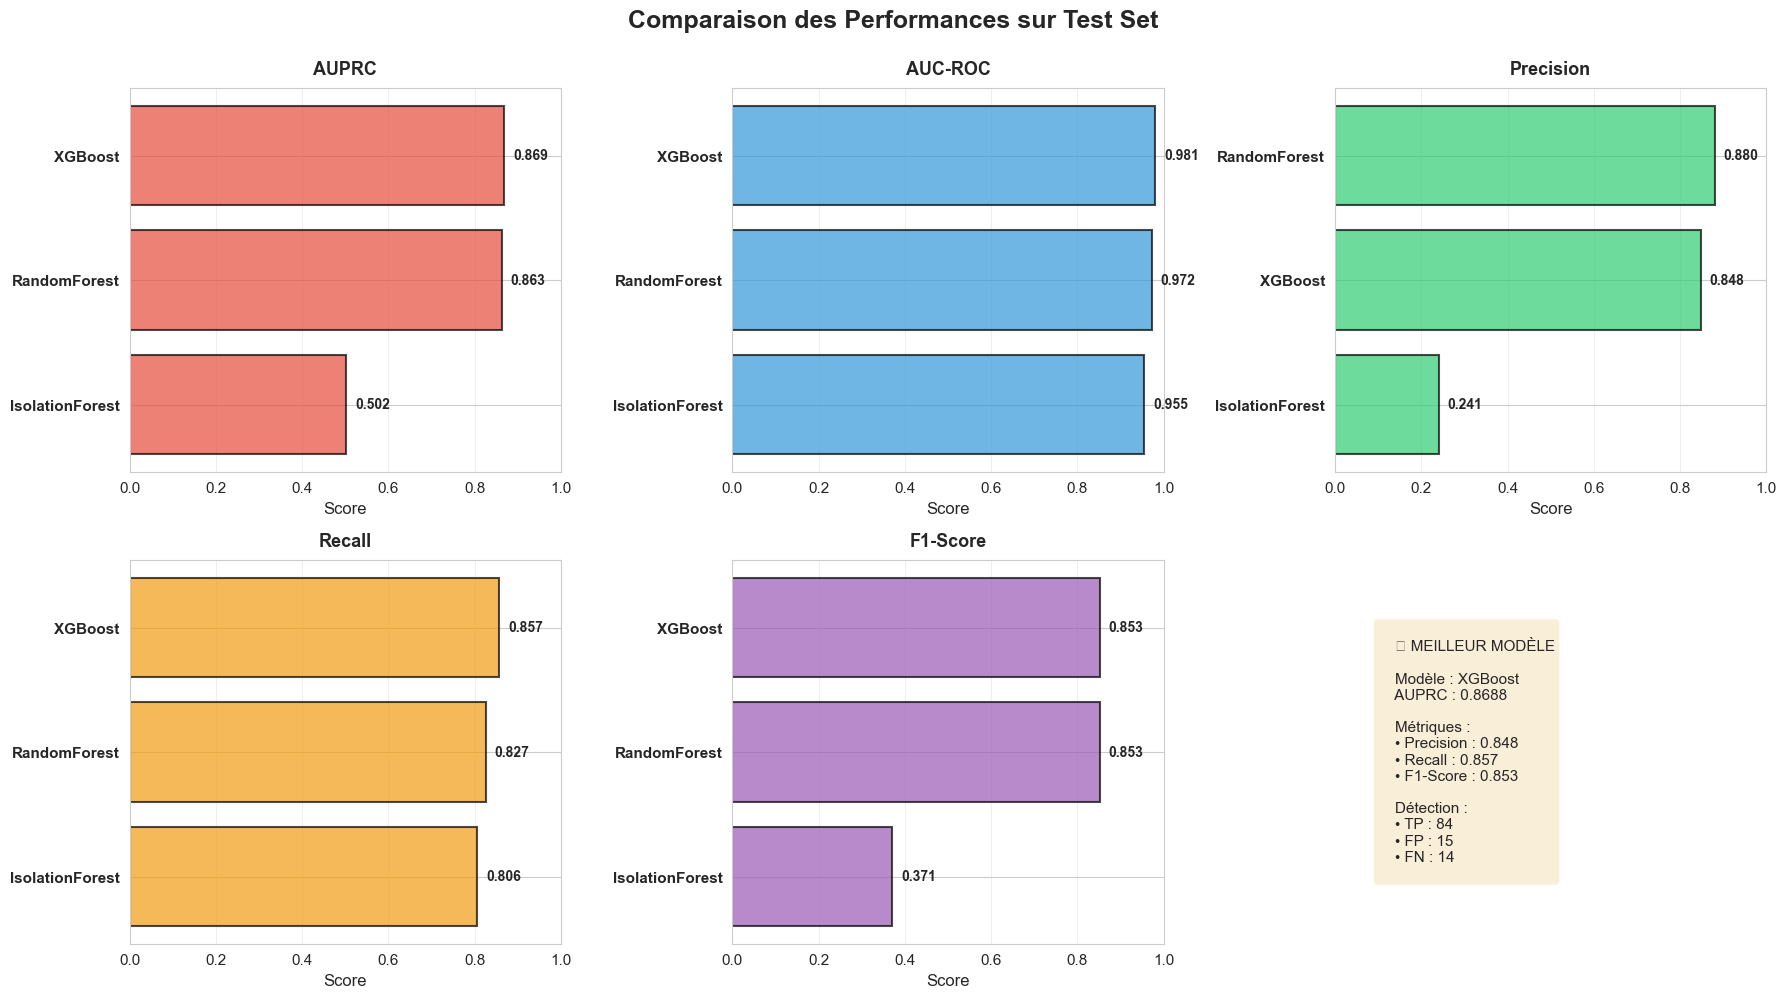

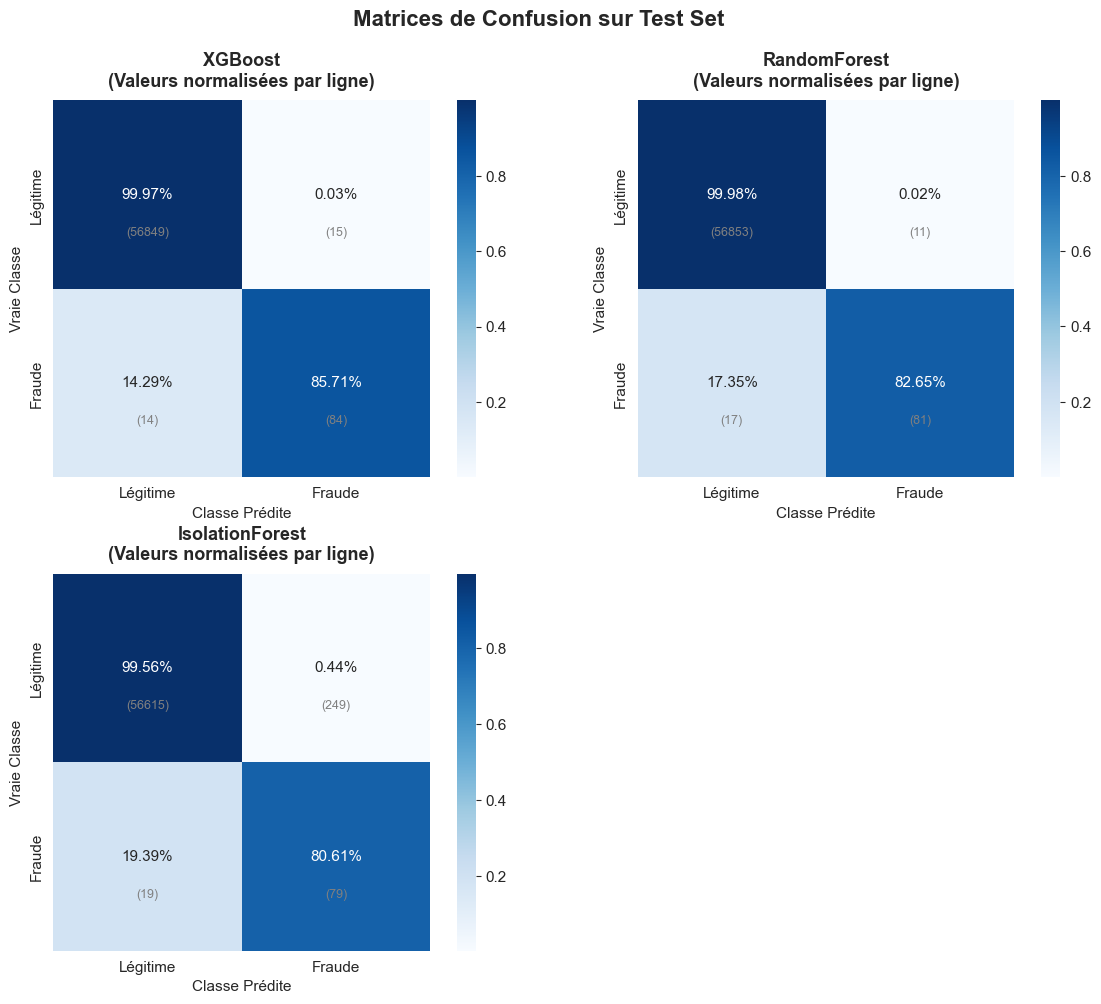

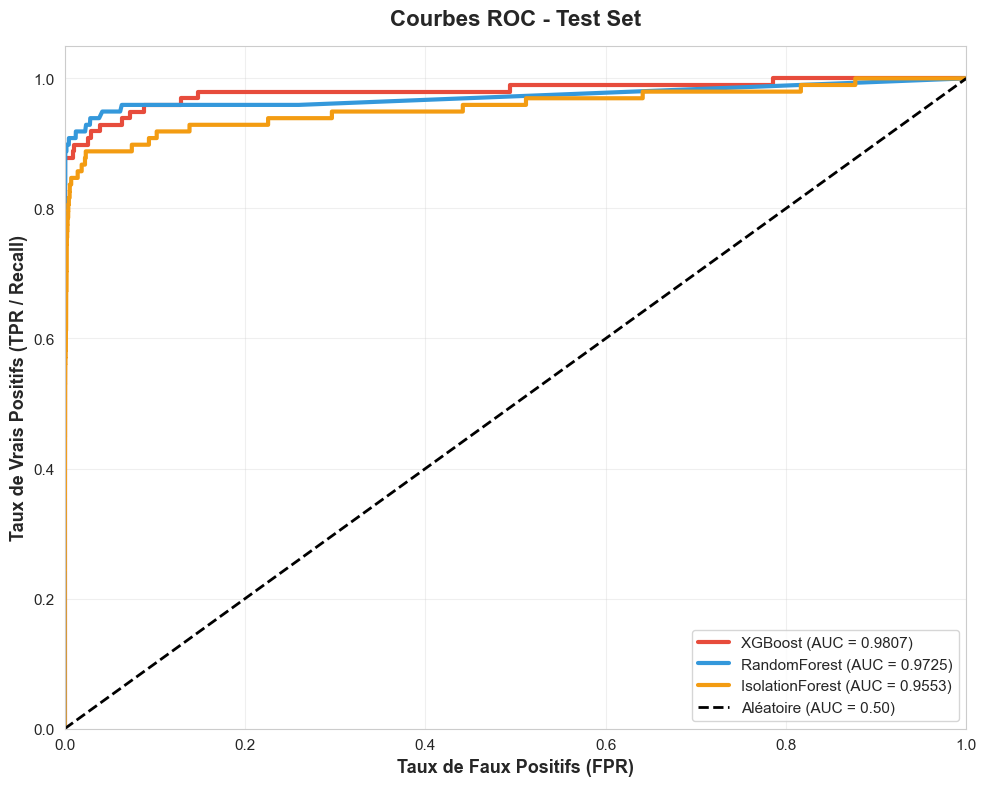

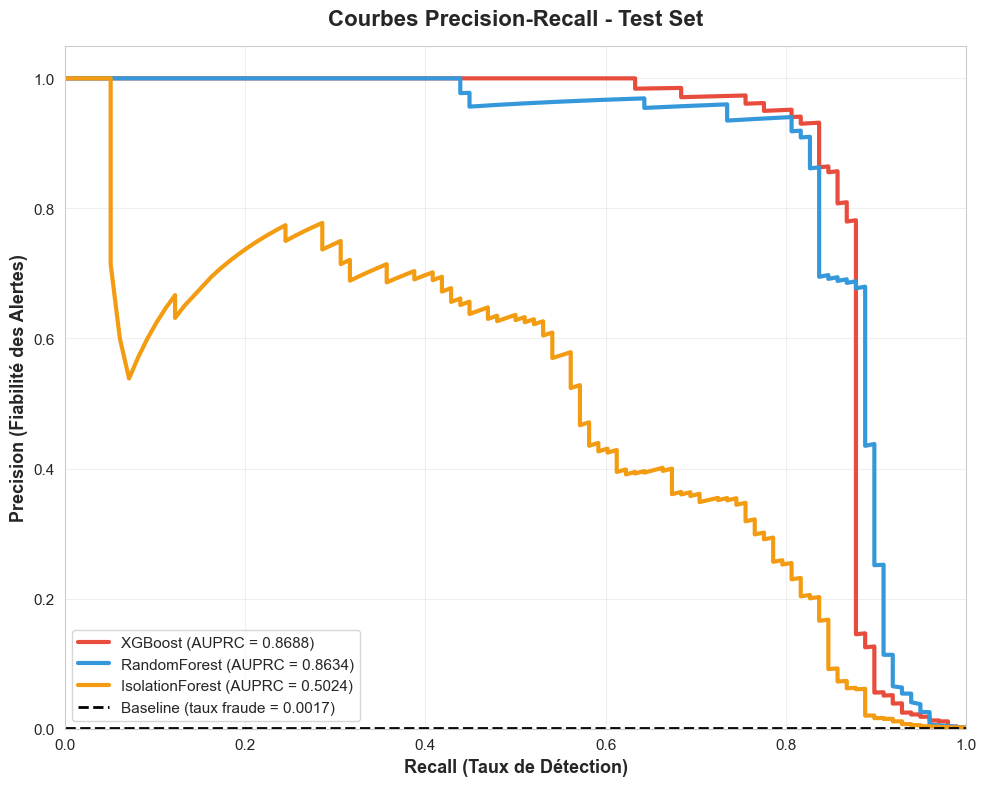

In [20]:
if __name__ == "__main__":
    
    print("""
    ╔═══════════════════════════════════════════════════════════════════════════╗
    ║           ÉVALUATION COMPLÈTE SUR TEST SET                                ║
    ╚═══════════════════════════════════════════════════════════════════════════╝
    """)
    
   
    X_test_processed, y_test, _ = data_preprocessing(X_test, y_test,TEMPORAL_FEATURES_SELECTED, test_data=True, scaler=scaler)

    anomaly_features_used = [
    'V17', 'V12', 'V14', 'V16', 'V11', 'V10', 'V7', 'V4', 
    'V18', 'V9', 'V2', 'Hour_sin', 'V21', 'V26', 'V3'
]

    
    # Évaluer tous les modèles
    results = evaluate_models_on_test(
        X_test_processed,
        y_test,
        models_dir='models',
        save_dir='img',
        anomaly_features=anomaly_features_used,
        verbose=True
    )
    
   
    plt.show()
   